In [1]:
import numpy as np
np.random.seed(14)

# Predicting House Sale Prices in Amos, Texas

### Abstract

The housing market is a deeply influential aspect of our economy. Banks, real-estate companies, and individuals have a large interest in predicting the selling price of a property. We focused on a segment of the population: property sales in Amos, Texas from 2006-2010. Our objectives were two fold. First, we strove to understand which features are most instrumental in deciding a sale price. Second, how can we use these features to accurately predict the price bucket or sale price of a property?

We explored our data and the many features it contains; we did this to the data as a whole as well as by neighborhood. We discovered that many dimensions are needed to capture a majority of the variance in the model, and although features that measure square footage and quality are ranked top in importance by several features rating algorithms, they alone cannot accurately predict class or price. We created two models for classification: a support vector model and a random forest classifier. Both achieved similar test metrics, significantly outperforming a dummy classifier. Lastly, we explored several models for a regression including: linear regression, lasso regression, random forest regression, and SVM regression. All models achieved similar r-squared metrics on the validation data, between .86 and .89.


### Introduction

Our goal was to accurately predict the sale price or price bucket of a property in Amos, Texas and to understand the factors that determine this price. We did this using a dataset consisting of all property sales in Amos, Texas from 2006-2010. Predicting sale price is important because the expected sale price determines factors such as bid prices and mortgage rates. The sale price of a property is the foundation for many financial decisions that run the real-estate market. After rudimentary data wrangling, such as filling NA values, we explored our data. We discovered that SalePrice is right skewed; we therefore deal with the log of SalePrice, which is more normally distributed.

After cleaning the data we continued to explore the data and its features. Performing PCA showed that 30 dimensions are needed just to account for 50% of the variance in the model; this revealed the complexity of the data foreshadowing that a significant number of features will likely be needed for high model performance. We analyzed feature importance using features scores from gradient boosting, a random forest, and variance. All techniques agreed that the following features are among the top 10 most influential features: ground living area, finished basement square footage, lot area, garage area, and total basement square footage. For all models we analysed the relevant metrics on an increasing number of features, according to several feature rankings, to determine the optimal number of features for that model. 

Before attempting to predict price we first explored several classification techniques to predict the general price bucket: 0 to 120,000 dollars, 120,000 to 200,000 dollars, or greater than 200,000 dollars. For classification we used a SVM and a Random Forest and compared our results to a baseline dummy classifier. Hyperparameters were chosen using several grid searches. Both models significantly outperformed the baseline and both models performed similarly on validation and test data: f1 scores greater than 0.8, the random forest using 7 features and the SVM using 15. However, the random forest did exhibit signs of overfitting.

Lastly, we developed a regression model to predict price. We explored linear regressions in addition to SVM and random forest regressions. The linear model required regularization: both Lasso and Ridge were explored. Hyperparameters were again chosen using several grid searches. Again all models achieved a similar level of accuracy with r-squared test scores between .86 and .89. The random forest used the fewest features; however, it had signs of overfitting and achieved the lowest test score of all the models. 

### Background

### Data

In [2]:
from project import get_data
from sklearn.model_selection import train_test_split

# get_data cleans the data and converts to fully numeric data
data, target = get_data('train.csv')
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.3)
y_train_binned = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in y_train]
y_test_binned  = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in y_test]
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
columns = data.columns

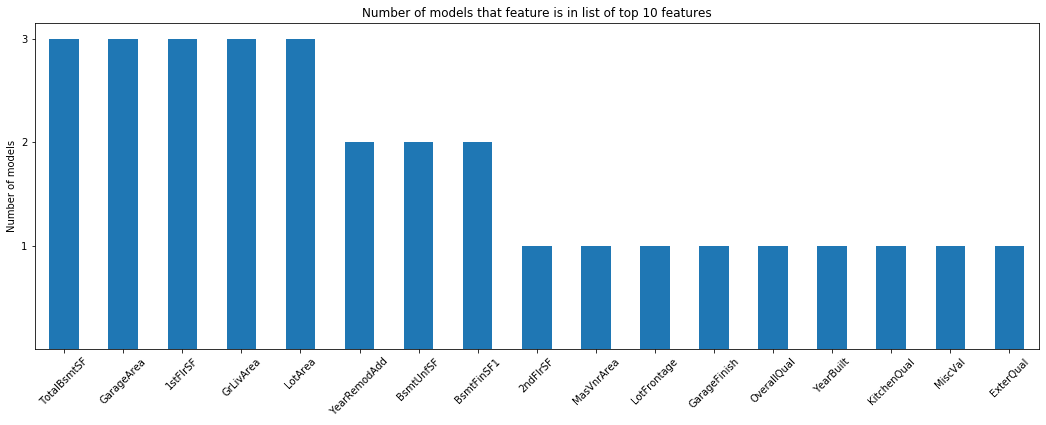

In [3]:
from project import graph_feature_importances
graph_feature_importances(X_train, y_train)

### Methods

#### I skipped everything else we did, only wrote about choosing the correct number of features

We explored our data using PCA to see if the many features can be effectively compressed into lower dimensions. When graphing the cumulative explained variance the following was our results.

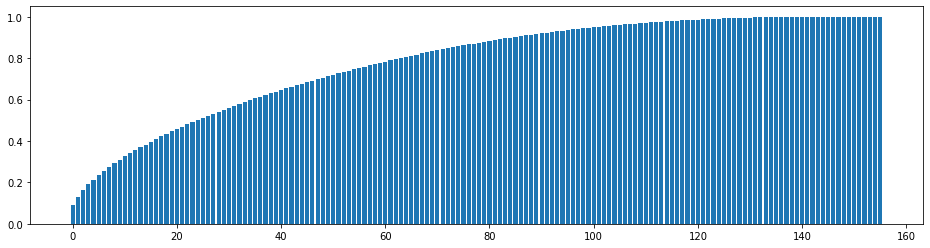

In [3]:
from project import graph_cum_variance
graph_cum_variance(X_train, y_train)

We see from here that the data is complex and multidimensional. Thirty principal components are required to account for 50% of the variance. Instead of using a select number of principal components to build our model we will seek out the model features that are most instrumental. This will also benefit our goal of understanding the factors that influence price by increasing the interpretability of our model.

So far we extracted feature importances from several algorithms; however, we have yet to decide which is the optimal number of features to use. For each model we iterated over an increasing number of features, in order of their ranking, to visualize when additional features are no longer significant. We have several ranking techniques which are similar, but not identical; so for example: the top 10 features from each of the ranking techniques combine to a set of 16 features.

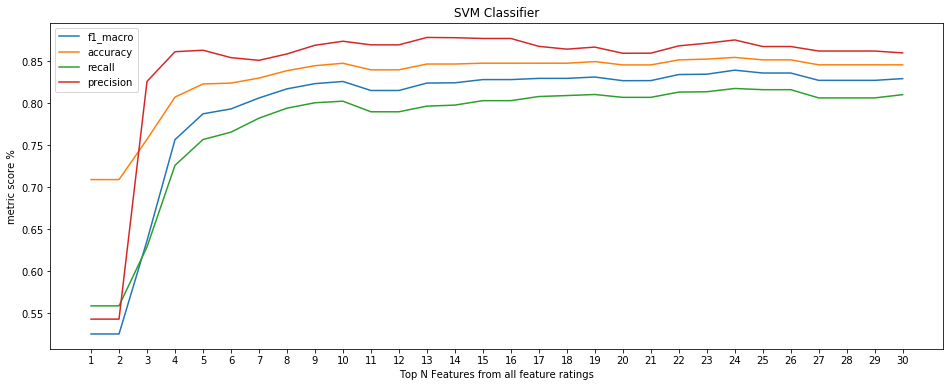

In [4]:
from project import graph_SVC_score_increasing_number_features
graph_SVC_score_increasing_number_features(X_train, y_train, y_train_binned)

SVC meets its optimal performance with the set of the top 8 features from the different feature rating algorithms. This totals to the following 16 features: '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'ExterQual', 'GarageArea', 'GarageFinish', 'GrLivArea', 'KitchenQual', 'LotArea', 'MiscVal', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt'.

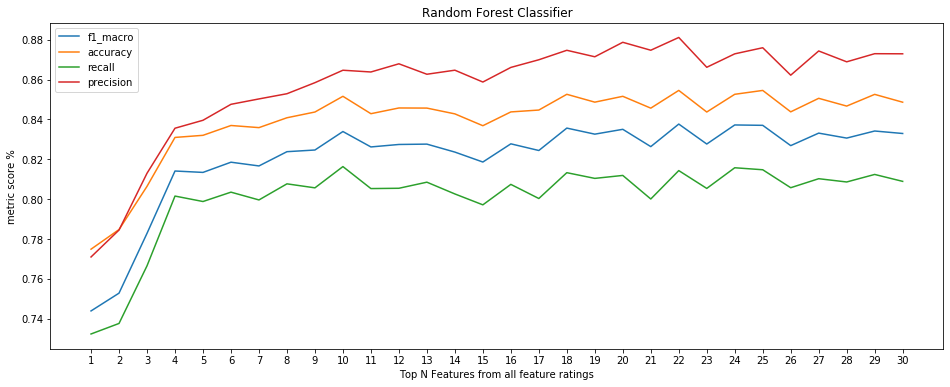

In [5]:
from project import graph_RFC_score_increasing_number_features
graph_RFC_score_increasing_number_features(X_train, y_train, y_train_binned)

The Random Forest Classifier meets its near optimal performance with fewer features: the set of the top 4 features. These are 'BsmtFinSF1', 'GarageArea', 'GrLivArea', 'LotArea', 'MiscVal', 'OverallQual', and 'TotalBsmtSF'.

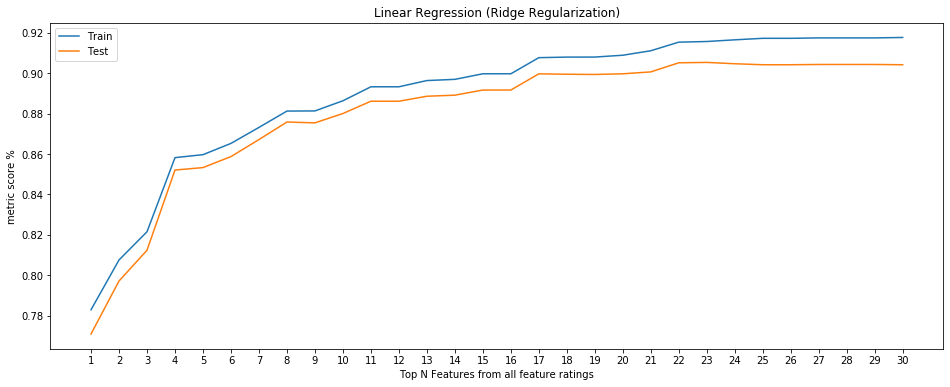

In [6]:
from project import graph_ridge_score_increasing_number_features
graph_ridge_score_increasing_number_features(X_train, y_train)

A linear regression using Ridge regularization meets its optimal performance the the set of top 15 features from each of the three ranking which totals to 28 features. They are: '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'EnclosedPorch', 'ExterQual', 'Fireplaces', 'GarageArea', 'GarageFinish', 'GarageType_Detchd', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd'.

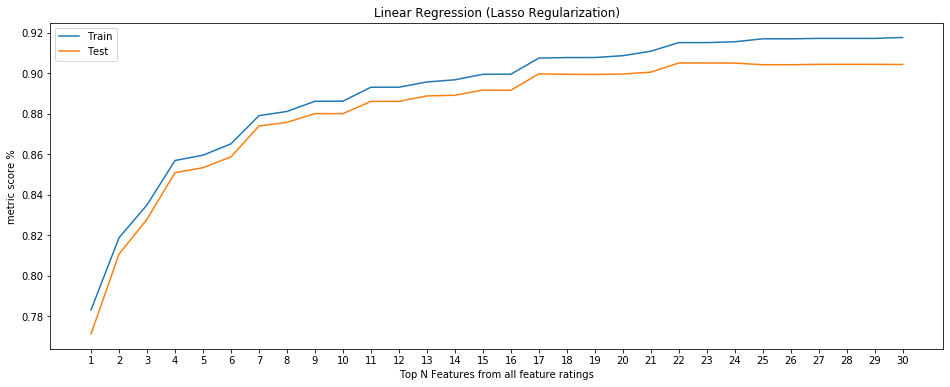

In [7]:
from project import graph_lasso_score_increasing_number_features
graph_lasso_score_increasing_number_features(X_train, y_train)

Linear regression with Lasso regularization is nearly identical to with Ridge regularization.

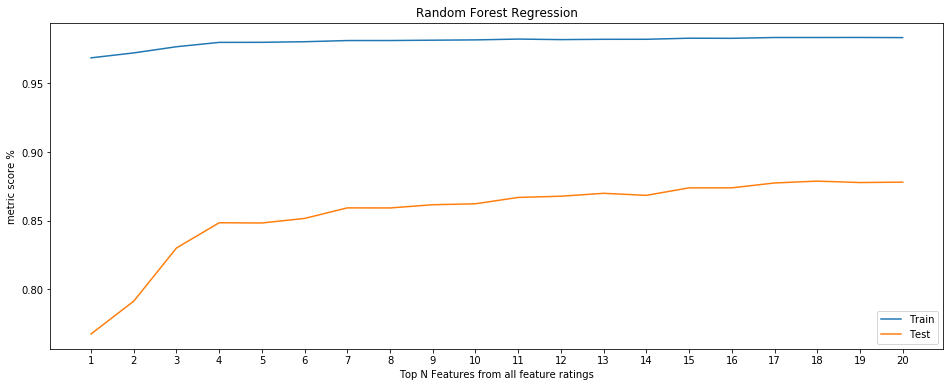

In [8]:
from project import graph_rf_score_increasing_number_features
graph_rf_score_increasing_number_features(X_train, y_train)

The random forest regression, like the classifier, reaches near optimal performance with the same set of top 4 features.

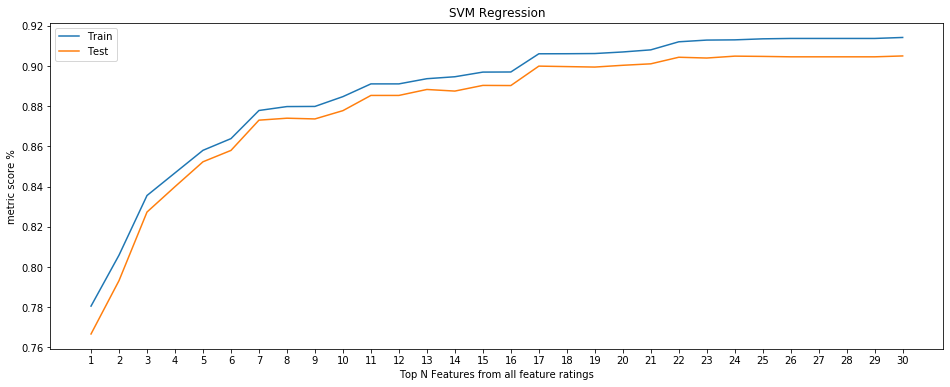

In [9]:
from project import graph_svr_score_increasing_number_features
graph_svr_score_increasing_number_features(X_train, y_train)

The SVM regressor requires more features to reach its optimal performance. It flattens out at the set of top 16 features which totals the same 28 features used in the linear regressions.

### Evaluation

blah blah blah talk about classifications scores

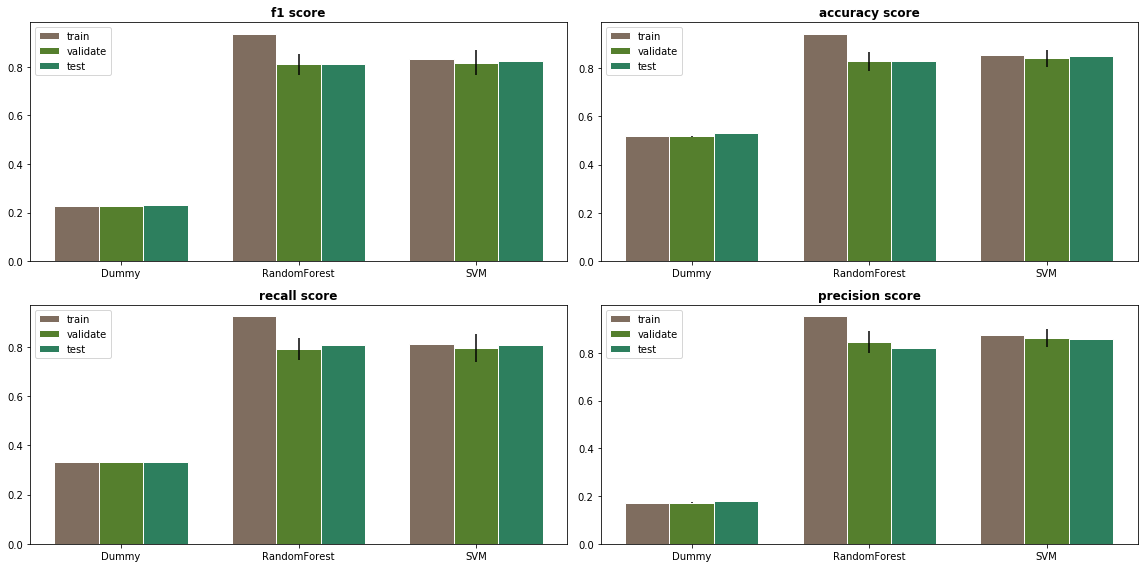

In [10]:
from project import graph_clf_scores
graph_clf_scores()

talk more about regression scores

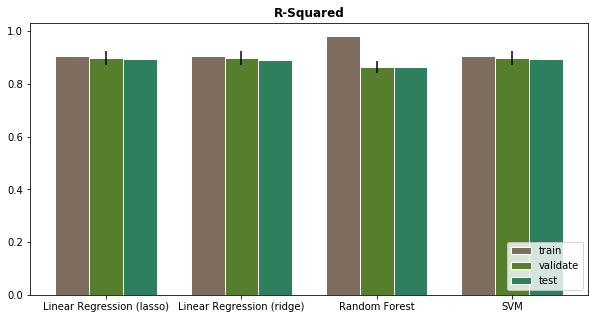

In [11]:
from project import graph_reg_scores
graph_reg_scores()

### Conclussion

### Attribution

### Bibliography

### Appendex